# Установка gmaps
Чтобы карта заработала, в Anaconda Prompt выполните 3 комманды:

$ jupyter nbextension enable --py --sys-prefix widgetsnbextension

$ pip3 install gmaps

$ jupyter nbextension enable --py --sys-prefix gmaps

Также не забудьте исправить пути к файлам данных. После этого последовательно выполните все строки ноутбука. Лучше всего карта смотрится на спутнике

In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip3 install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [3]:
import pandas as pd
import gmaps
import numpy as np
import ipywidgets as widgets
import ipywidgets as interact

import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
JupyterDash.infer_jupyter_proxy_config()

In [4]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server


In [5]:
t5=pd.read_csv('c:/python/table5.csv',sep=';',encoding='cp1251')
t5.ID=list(map(lambda x: x.lower(),t5.ID))
t5.head()

,ID,Diplom,Org,DataV,longitude,latitude
0,1ba7f3b0-65dd-40d2-8bba-7b925eefce73,Аттестат о среднем (полном) общем образовании,Муниципальное бюджетное общеобразовательное уч...,2017.0,58.380163,45.502305
1,fde0c7a1-5491-4c68-a35b-18bdff972061,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Российский экономический университет...",2017.0,55.727124,37.628815
2,6a6c3464-d534-43ca-9c79-e7fc5601ef8c,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468
3,2178eac4-828c-46c9-acbb-7bc81c28952e,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468
4,3244d4ab-efdb-4e46-8000-f1faee35cf6e,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468


In [6]:
t3=pd.read_csv('c:/python/table3.csv',sep=';',encoding='cp1251')
t3['Bak']=list(map(lambda x: 1 if x in [u'Бакалавриат',u'Специалитет'] else 0,t3.Uroven))
t3.ID=list(map(lambda x: x.lower(),t3.ID))
t3=t3[['ID','Zach','Bak']].groupby('ID').max().reset_index()
t3.head()

,ID,Zach,Bak
0,00381fea-1ac1-4999-a854-e4166aa9d938,1,0
1,006d6560-8fd2-41b8-b41b-6cda851a57d3,1,0
2,006f9f5a-2ac9-4dea-b75f-342c91b6d596,0,1
3,00719172-3cb4-4b3f-bbd0-1cd23704f20b,0,1
4,0086a8b2-2bd3-4af2-a957-02c98ce2e65e,1,1


In [7]:
t5=t5.merge(t3,on='ID',how='left')
t5.head()

,ID,Diplom,Org,DataV,longitude,latitude,Zach,Bak
0,1ba7f3b0-65dd-40d2-8bba-7b925eefce73,Аттестат о среднем (полном) общем образовании,Муниципальное бюджетное общеобразовательное уч...,2017.0,58.380163,45.502305,1,1
1,fde0c7a1-5491-4c68-a35b-18bdff972061,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Российский экономический университет...",2017.0,55.727124,37.628815,0,0
2,6a6c3464-d534-43ca-9c79-e7fc5601ef8c,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468,1,0
3,2178eac4-828c-46c9-acbb-7bc81c28952e,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468,1,0
4,3244d4ab-efdb-4e46-8000-f1faee35cf6e,Диплом о высшем профессиональном образовании,"ФГБОУ ВО ""Костромской государственный универси...",2017.0,57.759585,40.942468,1,0


In [43]:
KluchD="Input your key"
gmaps.configure(api_key=KluchD)

c1=57.768144
c2=40.930291
kostroma_coordinates = (c1, c2)

In [44]:
info_box_template = """ 
<dl> 
<dt>Name</dt><dd>{Org}</dd> 
<dt>Statements</dt><dd>{cols}</dd> 
</dl> 
""" 

In [45]:
def find_info (cols=20,this_year=False,bak=False,zach=False):
    m=np.array([True]*len(t5))
    if this_year:
        m=m&(t5.DataV==2017)
    if bak:
        m=m&(t5.Bak==1)
    if zach:
        m=m&(t5.Zach==1)
    gt=t5[['Org','longitude','latitude']][m].dropna().groupby(['longitude','latitude'])
    orgs=gt.min().reset_index().merge(gt.size().to_frame('cols').reset_index(), on=['longitude','latitude'],how='inner')
    locs=gt.size().reset_index()
    el_locations = np.array(orgs[orgs.cols>cols][['longitude','latitude']])
    el_info = [info_box_template.format(**el) for itr,el in orgs[orgs.cols>cols].iterrows()]
    return (el_locations, el_info)

In [46]:
class ReverseGeocoder(object):
    def __init__(self):
        initial_data = 20
        self.fig= self._render_map(initial_data)
        title_widget = widgets.HTML(
            '<h3>Заявки на поступление </h3>'
            '<h4>в <a href="http://ksu.edu.ru">Костромской государственный университет</a></h4>'
        )
        controls = self._render_controls(initial_data)
        self._container = widgets.VBox([title_widget, controls, self.fig])
        

    def _render_map(self, initial_data):
        fig = gmaps.figure(center=kostroma_coordinates, zoom_level=11)
        locations=np.array(t5[['longitude','latitude']].dropna())
        self._heatmap = gmaps.heatmap_layer(locations, max_intensity = 100, point_radius = 20)
        fig.add_layer(self._heatmap)
        el_locations,el_info=find_info(cols=20)
        self._markermap=gmaps.drawing_layer(features=list(map(lambda x: gmaps.Marker(tuple(x[0]),info_box_content=x[1]),
                                                              zip(el_locations, el_info))))
        fig.add_layer(self._markermap)
        return fig
    
    def _render_controls(self, initial_data):
        self._slider = widgets.IntSlider(
            value=initial_data,
            min=0,
            max=50,
            description=u'Количество заявок',
            continuous_update=False
        )
        self._total_box = widgets.Checkbox(
            value=False,
            description='Выпускники этого года',
            disabled=False
        )
        self._bak_box = widgets.Checkbox(
            value=False,
            description='Только бакалавры и специалисты',
            disabled=False
        )
        self._zach_box = widgets.Checkbox(
            value=False,
            description='Только зачисленные',
            disabled=False
        )

        self._slider.observe(self._on_data_change, names='value')
        self._total_box.observe(self._on_data_change, names='value')
        self._bak_box.observe(self._on_data_change, names='value')
        self._zach_box.observe(self._on_data_change, names='value')
        
        controls = widgets.VBox(
            [self._slider, self._total_box, self._bak_box, self._zach_box],
            layout={'justify_content': 'space-between'}
        )
        return controls

    def render(self):
        return self._container

    def _on_data_change(self, change):
        dat = self._slider.value
        cv = self._total_box.value
        bv = self._bak_box.value
        zv = self._zach_box.value
        m=np.array([True]*len(t5))
        if cv:
            m=m&(t5.DataV==2017)
        if bv:
            m=m&(t5.Bak==1)
        if zv:
            m=m&(t5.Zach==1)
        locations=np.array(t5[['longitude','latitude']][m].dropna())
        self._heatmap.locations = locations
        el_locations,el_info=find_info(cols=dat,this_year=cv,bak=bv,zach=zv)
        self._markermap.features=list(map(lambda x: gmaps.Marker(tuple(x[0]),info_box_content=x[1]),
                                                              zip(el_locations, el_info)))
        return self._container

ReverseGeocoder().render()

In [47]:
info_box_template = "{Org}$${cols}" 

def find_info (cols=0,this_year=False,bak=False,zach=False):
    m=np.array([True]*len(t5))
    if this_year:
        m=m&(t5.DataV==2017)
    if bak:
        m=m&(t5.Bak==1)
    if zach:
        m=m&(t5.Zach==1)
    gt=t5[['Org','longitude','latitude']][m].dropna().groupby(['longitude','latitude'])
    orgs=gt.min().reset_index().merge(gt.size().to_frame('cols').reset_index(), on=['longitude','latitude'],how='inner')
    locs=gt.size().reset_index()
    el_locations = np.array(orgs[orgs.cols>cols][['longitude','latitude']])
    el_info = [info_box_template.format(**el) for itr,el in orgs[orgs.cols>cols].iterrows()]
    
    orgs.columns=['lat', 'lng', 'Org', 'cols']
    dicts = orgs.to_dict('rows')
    for item in dicts:
        item["tooltip"] = "{:.1f}".format(item['cols'])  # bind tooltip
        item["popup"] = item["Org"]  # bind popup
    geojson = dlx.dicts_to_geojson(dicts, lon="lng")  # convert to geojson
    gd = dlx.geojson_to_geobuf(geojson)  # convert to geobuf
    
    return (dict(min=cols, max=orgs.cols.max()),el_locations, el_info, gd)




def get_info(feature=None):
    header = [html.H3("Заявки на поступление"),
              html.A('Костромской государственный университет',href='http://ksu.edu.ru')]
    return header

def _on_data_change(entered_value,params):
    dat = int(entered_value)
    cv = 'Vip' in params
    bv = 'Bak' in params
    zv = 'Zach' in params
    m=np.array([True]*len(t5))
    if cv:
        m=m&(t5.DataV==2017)
    if bv:
        m=m&(t5.Bak==1)
    if zv:
        m=m&(t5.Zach==1)
    locations=np.array(t5[['longitude','latitude']][m].dropna())
    #self._heatmap.locations = locations
    mm,el_locations,el_info,gd=find_info(cols=dat,this_year=cv,bak=bv,zach=zv)
    ret1=list(map(lambda x: dl.Marker(position=tuple(x[0]),
                                      children=dl.Tooltip(html.Div([html.H5(el) for el in x[1].split('$$')]))), 
                  zip(el_locations, el_info)))
    return mm,ret1,gd



In [48]:
import random
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash_extensions.javascript import Namespace
import json
from dash import Dash
from dash.dependencies import Input, Output



info = html.Div(children=get_info(), id="info", className="info",
                style={"position": "absolute", "top": "10px", "right": "10px", "z-index": "1000"})


CHL=html.Div(children=dcc.Checklist(id='chr_el',
        options=[
            {'label': 'Выпускники этого года', 'value': 'Vip'},
            {'label': 'Только бакалавры и специалисты', 'value': 'Bak'},
            {'label': 'Только зачисленные', 'value': 'Zach'}
        ],
        value=[],
        labelStyle={'display': 'flex'}
    ),id='chl',className="chl",
                style={"position": "absolute", "top": "90px", "left": "1030px", "z-index": "1000"}
)

SLDR=html.Div(children=dcc.Slider(min=0,max=50,step=1,value=0,id='sldr_el'),
              id='sldr',className="sldr",
              style={"position": "absolute", "top": "160px", "left": "1100px","right":"10px", "z-index": "1000"}
)
TXTSLDR=html.Div(children=html.H4('Количество:')  ,
              id='txtsldr',className="txtsldr",
              style={"position": "absolute", "top": "140px", "left": "1035px", "z-index": "1000"}
)
TXTres=html.Div(children=html.H4(children=0,id='cols')  ,
              id='txtres',className="txtres",
              style={"position": "absolute", "top": "140px", "left": "1305px", "z-index": "1000"}
)

# Create some markers.
#points = [dict(lat=55.5 + random.random(), lon=9.5 + random.random(), value=random.random()) for i in range(100)]
#data = dlx.dicts_to_geojson(points)

minmax,lr,geodata = _on_data_change(0,[])


# Setup a few color scales.
csc_map = {"Rainbow": ['red', 'yellow', 'green', 'blue', 'purple'],
           "Hot": ['yellow', 'red', 'black'],
           "Viridis": "Viridis"}
csc_options = [dict(label=key, value=json.dumps(csc_map[key])) for key in csc_map]
default_csc = "Rainbow"
dd_csc = dcc.Dropdown(options=csc_options, value=json.dumps(csc_map[default_csc]), id="dd_csc", clearable=False)
# Create a colorbar.
colorbar = dl.Colorbar(colorscale=csc_map[default_csc], id="colorbar", width=20, height=150, 
                       style={"top": "170px"},**minmax)


# Create geojson.
ns = Namespace("dlx", "scatter")
#geojson = dl.GeoJSON(data=data, options=dict(pointToLayer=ns("pointToLayer")))
geojson = dl.GeoJSON(data=geodata, id="geojson", format="geobuf",
                     #zoomToBounds=True,  # when true, zooms to bounds when data changes
                     cluster=True,  # when true, data are clustered
                     clusterToLayer=ns("clusterToLayer"),  # how to draw clusters
                     zoomToBoundsOnClick=True,  # when true, zooms to bounds of feature (e.g. cluster) on click
                     options=dict(pointToLayer=ns("pointToLayer")),  # how to draw points
                     superClusterOptions=dict(radius=150),  # adjust cluster size
                     hideout=dict(colorscale=csc_map[default_csc], colorProp='cols', **minmax))

LG=dl.LayerGroup(children=lr,id="layer")


# Create the app.
app = dash.Dash(external_scripts=["https://cdnjs.cloudflare.com/ajax/libs/chroma-js/2.1.0/chroma.min.js"])
app.layout = html.Div([
    dl.Map([dl.TileLayer(),info,CHL,TXTSLDR,SLDR,TXTres,LG,colorbar,geojson], 
           center=kostroma_coordinates, zoom=11, style={'height': '100vh'}),html.Div([dd_csc],
             style={"position": "relative", "bottom": "80px", "left": "10px", "z-index": "1000", "width": "200px"})
], style={'width': '100%', 'height': '50vh', 'margin': "auto", "display": "block", "position": "relative"})







@app.callback(
    Output("geojson", "hideout"), 
    Output("geojson", "data"), 
    Output('cols', 'children'),
    Output('layer', 'children'),
    Output("colorbar", "colorscale"),
    Output("colorbar", "min"), 
    Output("colorbar", "max"),
    Input("dd_csc", "value"),
    Input('sldr_el', 'value'),
    Input('chr_el', 'value'))
def update_text(csc, entered_value, params):
    minmax,par1,gd=_on_data_change(entered_value,params)
    csc= json.loads(csc)
    hideout = dict(colorscale=csc, colorProp='cols', **minmax)
    #return hideout, data, csc, mm["min"], mm["max"]
    
    return hideout,gd,entered_value,par1,csc, minmax["min"], minmax["max"]



if __name__ == '__main__':
    app.run_server(debug=False, port=8152)

C:\Users\inf_s\anaconda3\lib\site-packages\pandas\core\frame.py:1490: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8152/ (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2022 10:30:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:30:11] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:30:12] "GET /_dash-layout HTTP/1.1" 200 -
C:\Users\inf_s\anaconda3\lib\site-packages\pandas\core\frame.py:1490: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

127.0.0.1 - - [19/May/2022 10:30:19] "POST /_dash-update-component HTTP/1.1" 200 -
C:\Users\inf_s\anaconda3\lib\site-packages\pandas\core\frame.py:1490: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

127.0.0.1 - - [19/May/2022 10:30:30] "POST /_dash-update-component HTTP/1.1" 20

In [36]:
from PIL import Image
import requests 
import urllib 
import codecs
from six.moves.urllib.request import urlopen
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash_extensions.javascript import Namespace
import json
from dash import Dash
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

reader = codecs.getreader("utf-8")
f = urlopen('https://raw.githubusercontent.com/Kreozot/russian-geo-data/master/geo.json')
geometry = json.load(reader(f))
f.close()


In [37]:
df_rep=pd.DataFrame([x['properties']['NAME_1'] for x in geometry["features"]],columns=['NAME_1'])
df_rep.index=df_rep['NAME_1']
for el in range(2010,2020):
    df_rep[str(el)]=np.random.rand(len(geometry['features']))*100
df_rep['mean']=df_rep[df_rep.columns[1:]].mean(axis=1)
df_rep.head()

,NAME_1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
NAME_1,,,,,,,,,,,,
Karachay-Cherkess,Karachay-Cherkess,75.272890,22.933158,24.865090,21.037492,32.014698,48.369771,2.704837,44.394839,97.682858,13.965569,38.324120
Karelia,Karelia,93.823726,35.281031,58.959179,73.587670,67.848490,24.687286,44.814870,66.734345,35.524700,13.567603,51.482890
Kemerovo,Kemerovo,56.740018,76.231620,80.728285,79.460764,83.147523,22.483073,64.260955,18.746317,88.268138,12.509255,58.257595
Khabarovsk,Khabarovsk,41.875845,60.306402,77.140638,47.467423,50.864350,65.264042,91.825075,97.310964,97.757782,26.721925,65.653445
Khakass,Khakass,76.608068,87.708763,31.206360,14.314064,19.541892,17.157911,22.346488,29.638831,72.442132,11.393840,38.235835


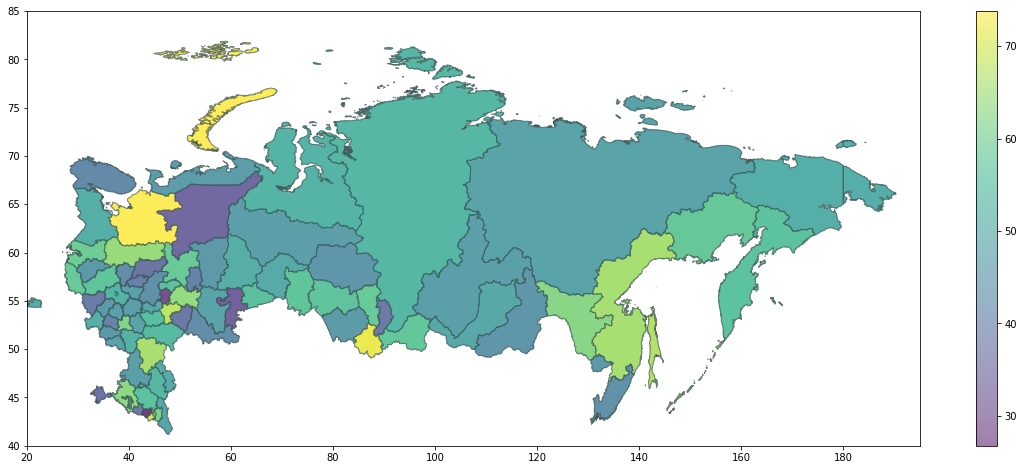

In [38]:
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(20,8))
ppatches=[]
colors=[]
iii=-1
for feature in geometry['features']:
    nnn=feature['properties']['NAME_1']
    rrr=df_rep.loc[nnn]['mean']
    if feature['geometry']['type']=='Polygon':
        iii+=1
        pole=np.array(feature['geometry']['coordinates'][0]).T
        
        if len(pole.shape)!=2:
            pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
        colors.append(rrr)

    elif feature['geometry']['type']=='MultiPolygon':
        iii+=1
        for eel in np.array(feature['geometry']['coordinates']):
            for el in eel:
                pole=np.array(el).T
                pole[0]=np.array(list(map(lambda x: x if x>0 else x+360,pole[0])))
                if len(pole.shape)!=2:
                    pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
                ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                colors.append(rrr)

        
    else:
        print (feature['properties']['NAME_1'])
p = PatchCollection(ppatches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ax.add_collection(p)
ax.set_xlim((20,195))
ax.set_ylim((40,85))

plt.show()

In [39]:
from urllib.request import urlopen
import json
import requests
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_leaflet as dl
import dash_leaflet.express as dlx
from dash_extensions.javascript import Namespace
from dash import Dash
from dash.dependencies import Input, Output
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/russia.geojson') as response:
    counties = json.load(response)
regions_republic_1 = ['Бурятия', 'Тыва', 'Адыгея', 'Татарстан', 'Марий Эл',
                      'Чувашия', 'Северная Осетия – Алания', 'Алтай',
                      'Дагестан', 'Ингушетия', 'Башкортостан']
regions_republic_2 = ['Удмуртская республика', 'Кабардино-Балкарская республика',
                      'Карачаево-Черкесская республика', 'Чеченская республика']
for k in range(len(counties['features'])):
    counties['features'][k]['id'] = k
    if counties['features'][k]['properties']['name'] in regions_republic_1:
        counties['features'][k]['properties']['name'] = 'Республика ' + counties['features'][k]['properties']['name']
    elif counties['features'][k]['properties']['name'] == 'Ханты-Мансийский автономный округ - Югра':
        counties['features'][k]['properties']['name'] = 'Ханты-Мансийский АО'
    elif counties['features'][k]['properties']['name'] in regions_republic_2:
        counties['features'][k]['properties']['name'] = counties['features'][k]['properties']['name'].title()
region_id_list = []
regions_list = []
for k in range(len(counties['features'])):
    region_id_list.append(counties['features'][k]['id'])
    regions_list.append(counties['features'][k]['properties']['name'])
df_regions = pd.DataFrame()
df_regions['region_id'] = region_id_list
df_regions['region_name'] = regions_list
for el in range(2010,2020):
    df_regions[str(el)]=np.random.rand(len(df_regions))*100
df_regions['mean']=df_regions[df_regions.columns[1:]].mean(axis=1)
df_regions.head()

,region_id,region_name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
0,0,Республика Бурятия,58.244746,65.768060,29.830475,73.795854,33.616874,61.683504,28.891543,59.332895,43.795290,17.012434,47.197168
1,1,Карачаево-Черкесская Республика,22.791467,36.907909,93.512100,65.946700,68.709527,11.909127,83.813725,17.189558,79.324551,65.236584,54.534125
2,2,Сахалинская область,92.179229,43.671123,0.427242,61.540122,99.335525,65.905059,27.122342,70.591854,80.410253,5.547878,54.673063
3,3,Воронежская область,6.681645,63.680820,87.749018,72.109747,15.942961,66.686753,47.673608,65.682394,33.961629,7.098215,46.726679
4,4,Томская область,51.720717,35.826674,4.230187,28.576800,51.018217,96.339582,77.681220,36.774730,0.711075,54.077855,43.695706


In [40]:
fig = go.Figure(go.Choroplethmapbox(geojson=counties,
                           locations=df_regions['region_id'],
                           z=df_regions['mean'],
                           text=df_regions['region_name'],
                           colorscale=[[0, 'rgb(34, 150, 79)'],
                                       [0.2, 'rgb(249, 247, 174)'],
                                       [0.8, 'rgb(253, 172, 99)'],
                                       [1, 'rgb(212, 50, 44)']],
                           colorbar_thickness=20,
                           customdata=df_regions['mean'],
                           hovertemplate='<b>%{text}</b>'+ '<br>' +
                                         'Выздоровело: %{z}' +
                                         '<extra></extra>',
                           hoverinfo='text, z'))

In [41]:
def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


In [49]:
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=2, mapbox_center = {"lat": 66, "lon": 94})
fig.update_traces(marker_line_width=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


GRPS=dcc.Graph(id='xseries',
               style={"position": "absolute", "width": "300px", "height":"200px", "top": "10px", "left": "10px"})



app = dash.Dash(external_scripts=["https://cdnjs.cloudflare.com/ajax/libs/chroma-js/2.1.0/chroma.min.js"])
app.layout = html.Div([dcc.Graph(figure=fig,id='maps'),GRPS], 
                      style={'width': '100%', 'height': '80vh', 'margin': "auto", "display": "block", "position": "relative"})
num_reg=0
@app.callback(
    dash.dependencies.Output('xseries', 'figure'),
    dash.dependencies.Input('maps', 'hoverData'))
def update(hoverData):
    if hoverData is None:
        return create_time_series({'Year':list(range(2010,2020)),'Value':[0]*10}, 'Linear', 'None')
    else:
        num_reg=np.int32(hoverData['points'][0]['location'])
        #C=np.array(df_regions[df_regions['region_id']==num_reg][df_regions[1:-1]])[0]
        trend_reg=np.array(df_regions.loc[num_reg][df_regions.columns[2:-1]])
        name_reg=df_regions.loc[num_reg]['region_name']
        return create_time_series({'Year':list(range(2010,2020)),'Value':trend_reg}, 'Linear', name_reg)     
        
        
        
if __name__ == '__main__':
    app.run_server(debug=False, port=8152)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8152/ (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2022 10:50:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:01] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:09] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:41] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2022 10:51:49] "POST /_dash-update-component